In [7]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [13]:
# Read your api key environment variable
api_key = os.getenv("news_api")


In [14]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [15]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin AND Bitcoin",language="en",page_size=100,sort_by="relevancy")

In [16]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en")


In [17]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()


,text,compound,positive,negative,neutral
0,Bitcoin is going through a remarkably bad day....,-0.2944,0.074,0.078,0.847
1,After launching two cryptocurrency-oriented sm...,0.0000,0.000,0.000,1.000
2,Indias Supreme Court on Wednesday overturned c...,-0.5106,0.103,0.168,0.730
3,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.068,0.000,0.932
4,Former Coinbase chief legal officer Brian Broo...,0.4939,0.085,0.000,0.915


In [19]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()

,text,compound,positive,negative,neutral
0,Bitcoin is going through a remarkably bad day....,-0.2944,0.074,0.078,0.847
1,If a player picks up an item in an online vide...,0.0000,0.000,0.000,1.000
2,"Coinbase Card, the Visa debit card that lets y...",-0.1027,0.000,0.035,0.965
3,When it comes to celebrities shilling shady in...,0.3182,0.112,0.066,0.822
4,The South Korean National Assembly passed new ...,0.4019,0.068,0.000,0.932


In [20]:
# Describe the Bitcoin Sentiment
bitcoin_df.iloc[:, 1:5].describe()



,compound,positive,negative,neutral
count,93.000000,93.000000,93.000000,93.000000
mean,0.130571,0.080183,0.055097,0.864753
std,0.522393,0.064745,0.067274,0.085471
min,-0.933700,0.000000,0.000000,0.616000
25%,-0.340000,0.046000,0.000000,0.820000
50%,0.318200,0.068000,0.042000,0.882000
75%,0.507000,0.107000,0.095000,0.932000
max,0.923100,0.331000,0.295000,1.000000


In [21]:
# Describe the Ethereum Sentiment
ethereum_df.iloc[:, 1:5].describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.165926,0.071053,0.041105,0.887895
std,0.467050,0.060564,0.045282,0.060976
min,-0.717400,0.000000,0.000000,0.762000
25%,-0.051350,0.022500,0.000000,0.843000
50%,0.340000,0.068000,0.035000,0.899000
75%,0.459300,0.101500,0.063000,0.930000
max,0.895500,0.208000,0.133000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [25]:
# Expand the default stopwords list if necessary

# Expand the default stopwords list if necessary
sw_addon = {'chars'}

text = bitcoin_df.text[0]
regex = re.compile("[^a-zA-Z ]")
clean_text = regex.sub('', text)
sentence = sent_tokenize(clean_text)
words = []
for sent in sentence:
    word = word_tokenize(sent)
    words = words + word
words_lower = [word.lower() for word in words]
sw = set(stopwords.words('english'))
words_sw = [word for word in words_lower if word not in sw.union(sw_addon)]
tokens = [lemmatizer.lemmatize(word) for word in words_sw]

In [26]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    clean_text = regex.sub('', text)
    # Create a list of the words
    sentence = sent_tokenize(clean_text)
    words = []
    for sent in sentence:
        word = word_tokenize(sent)
        words = words + word    
    # Convert the words to lowercase
    words_lower = [word.lower() for word in words]    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    words_sw = [word for word in words_lower if word not in sw.union(sw_addon)]
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words_sw]
    return tokens

In [27]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = [tokenizer(text) for text in bitcoin_df['text']]
bitcoin_df.head()

,text,compound,positive,negative,neutral,tokens
0,Bitcoin is going through a remarkably bad day....,-0.2944,0.074,0.078,0.847,"[bitcoin, going, remarkably, bad, day, turn, a..."
1,After launching two cryptocurrency-oriented sm...,0.0000,0.000,0.000,1.000,"[launching, two, cryptocurrencyoriented, smart..."
2,Indias Supreme Court on Wednesday overturned c...,-0.5106,0.103,0.168,0.730,"[india, supreme, court, wednesday, overturnedc..."
3,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.068,0.000,0.932,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,Former Coinbase chief legal officer Brian Broo...,0.4939,0.085,0.000,0.915,"[former, coinbase, chief, legal, officer, bria..."


In [28]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = [tokenizer(text) for text in ethereum_df['text']]
ethereum_df.head()

,text,compound,positive,negative,neutral,tokens
0,Bitcoin is going through a remarkably bad day....,-0.2944,0.074,0.078,0.847,"[bitcoin, going, remarkably, bad, day, turn, a..."
1,If a player picks up an item in an online vide...,0.0000,0.000,0.000,1.000,"[player, pick, item, online, video, game, owns..."
2,"Coinbase Card, the Visa debit card that lets y...",-0.1027,0.000,0.035,0.965,"[coinbase, card, visa, debit, card, let, spend..."
3,When it comes to celebrities shilling shady in...,0.3182,0.112,0.066,0.822,"[come, celebrity, shilling, shady, initial, co..."
4,The South Korean National Assembly passed new ...,0.4019,0.068,0.000,0.932,"[south, korean, national, assembly, passed, ne..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [29]:
from collections import Counter
from nltk import ngrams

In [30]:
#Generate the Bitcoin N-grams where N=2
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('satoshi', 'nakaboto'), 30),
 (('robot', 'colleague'), 15),
 (('colleague', 'satoshi'), 15),
 (('nakaboto', 'writes'), 15),
 (('writes', 'bitcoin'), 15),
 (('every', 'fucking'), 15),
 (('fucking', 'daywelcome'), 15),
 (('daywelcome', 'another'), 15),
 (('another', 'edition'), 15),
 (('edition', 'bitcoin'), 15)]

In [31]:
# Generate the Ethereum N-grams where N=2
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('fell', 'first'), 3),
 (('first', 'time'), 3),
 (('debit', 'card'), 2),
 (('reutersbitcoin', 'tanked'), 2),
 (('tanked', 'thursday'), 2),
 (('thursday', 'fell'), 2),
 (('time', 'since'), 2),
 (('since', 'may'), 2),
 (('may', 'amid'), 2),
 (('amid', 'larger'), 2)]

In [32]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [33]:
# Get the top 10 words for Bitcoin
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('bitcoin', 80),
 ('satoshi', 30),
 ('nakaboto', 30),
 ('today', 21),
 ('going', 18),
 ('hour', 18),
 ('btc', 18),
 ('cryptocurrency', 18),
 ('used', 18),
 ('say', 18)]

In [34]:
# Get the top 10 words for Ethereum
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('cryptocurrency', 8),
 ('new', 7),
 ('bitcoin', 5),
 ('company', 5),
 ('first', 5),
 ('fell', 5),
 ('ethereum', 5),
 ('coinbase', 4),
 ('thursday', 4),
 ('selloff', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

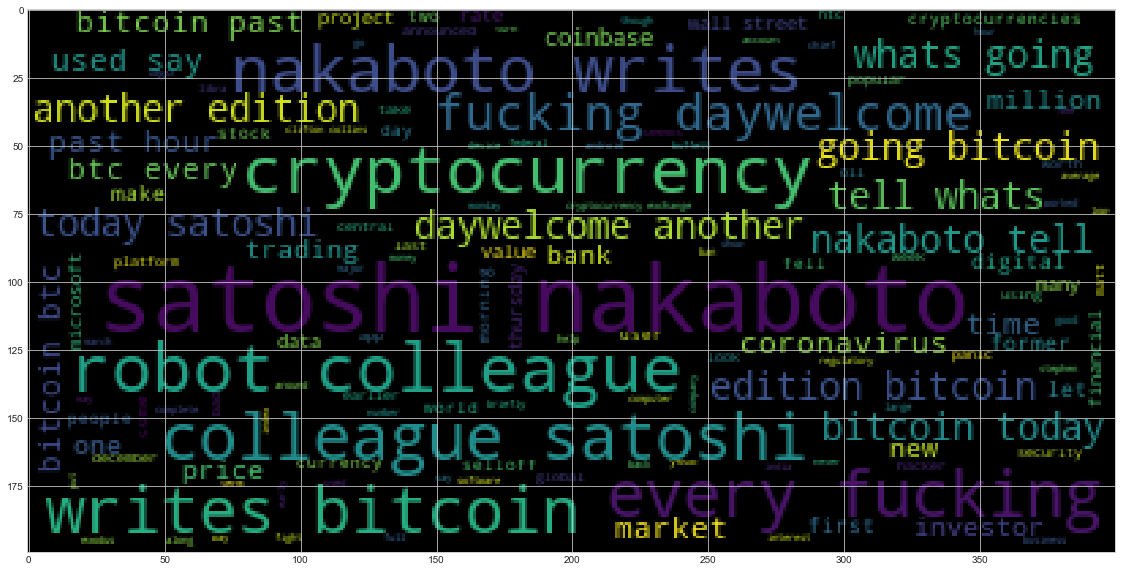

In [36]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

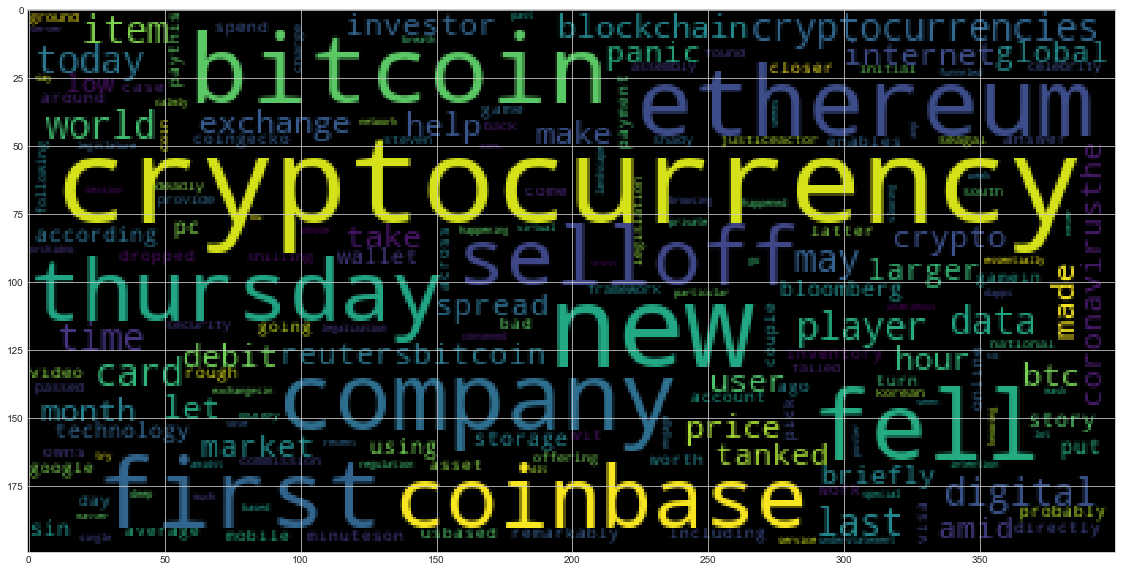

In [37]:
# Generate the Ethereum word cloud
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [39]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [42]:
# Concatenate all of the bitcoin text together
article = ' '.join(bitcoin_df['text'])
article

'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars] After launching two cryptocurrency-oriented smartphones, the HTC Exodus 1 and the Exodus 1s, the company is expanding the lineup with an entirely new device: a 5G router that can function as a full Bitcoin node.\xa0\r\nCalled the HTC Exodus 5G hub, the Android-bas… [+2230 chars] Indias Supreme Court on Wednesday overturned\xa0central banks two-year-old ban on cryptocurrency trading in the country in what many said was a historic verdict.\r\nThe Reserve Bank of India had imposed a ban on cryptocurrency trading in April 2018 that barred ban… [+1336 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you w

In [43]:
# Run the NER processor on all of the text
doc = nlp(article)
# Add a title to the document

In [44]:
# Render the visualization
displacy.render(doc, style='ent')

In [45]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
BTC ORG
around $7,250 MONEY
two CARDINAL
HTC Exodus 1 PRODUCT
Exodus WORK_OF_ART
5 CARDINAL
Bitcoin GPE
HTC Exodus 5 PRODUCT
Android-bas GPE
Indias Supreme Court ORG
Wednesday DATE
two-year-old DATE
The Reserve Bank of India ORG
April 2018 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Descartes PERSON
Brian Brooks PERSON
first ORDINAL
the Office of the Comptroller of the Currency ORG
April 1, 2020 DATE
Brooks ORG
OCC ORG
The South Korean National Assembly ORG
today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Rousseau PERSON
Success ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Hegel PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Sat

---

## Ethereum NER

In [46]:
# Concatenate all of the bitcoin text together
article = ' '.join(ethereum_df['text'])
article

"Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars] If a player picks up an item in an online video game, who owns that item? The player, or the company that made the game?\r\nIn most cases, the answer is probably closer to the latter. The item may be in the players digital inventory – but the company can take i… [+2713 chars] Coinbase Card, the Visa debit card that lets you spend cryptocurrency directly from your Coinbase account, now works with Google Pay.\xa0\r\nThis makes Coinbase, a U.S.-based cryptocurrency exchange, the first company that enables users to make mobile payments wit… [+1000 chars] When it comes to celebrities shilling shady initial coin offerings for money, the Securities and Exchange Commission is out for justice.\xa0\r\nActor Steven Seagal f

In [47]:
# Run the NER processor on all of the text

# Run the NER processor on all of the text
doc = nlp(article)
# Add a title to the document

In [48]:
# Render the visualization
displacy.render(doc, style='ent')

In [49]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
BTC ORG
around $7,250 MONEY
Visa ORG
Google Pay ORG
Coinbase PRODUCT
first ORDINAL
the Securities and Exchange Commission ORG
Steven Seagal PERSON
Thursday DATE
SEC ORG
2018 DATE
The South Korean National Assembly ORG
today DATE
this past week DATE
2020 CARDINAL
DApps &amp ORG
DLT ORG
Reuters
 ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
as low as $5,705.31 MONEY
Bloomberg ORG
Reuters
 ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
as low as $5,705.31 MONEY
Bloomberg ORG
7 CARDINAL
7 CARDINAL
one-day DATE
months DATE
Bitcoin GPE
21 percent PERCENT
the last 24 hours TIME
Earlier today TIME
Bitcoin GPE
6,000 MONEY
first ORDINAL
Some Libra Association ORG
Andreessen Horowitz PERSON
today DATE
50 CARDINAL
The Celo Foundation ORG
‘Alliance For Prosperity’ ORG
Camila Russo PERSON
Building the Next Internet with Ethereum WORK_OF_ART
Vitalik Buterin and PERSON
Jul PERSON
I